### Homework 3.3 - Please Help The Cat

A poor cat is trapped on canvas by an evil witch. Please help releasing the cat by breaking the curse using Discrete Fourier Transform learned in our magic class.

You may find the image at `images/poor-cat-trapped-on-canvas.jpg`. Note that the image has 3 color channels (RGB).

Please remember that the examples shown in class uses the book of spells from the ancient library. Try searching the newer spells on the internet.

**You must show all the steps clearly. Write your explanation in the markdown boxes.**

<img src="images/poor-cat-trapped-on-canvas.jpg" alt="A poor cat trapped on canvas" width="400">

### Read image

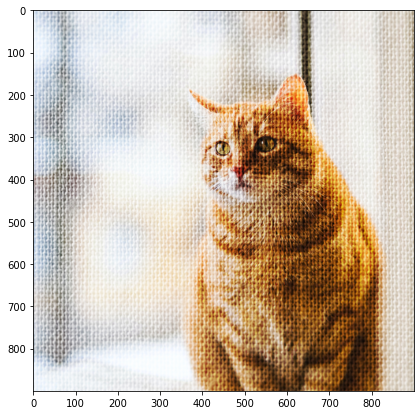

In [102]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

image = mpimg.imread('images/poor-cat-trapped-on-canvas.jpg')
plt.figure(figsize=(7,7))
plt.imshow(image)

### Convert to grayscale

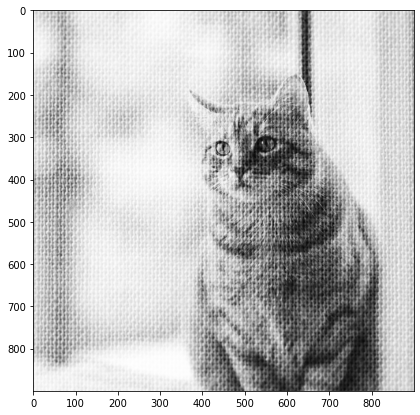

In [103]:
import numpy as np

grayim = np.dot(image, [0.2989, 0.5870, 0.1140])
plt.figure(figsize=(7,7))
plt.imshow(grayim, cmap='gist_gray')

### Fast Fourier Transform

Use Fast Fourier Transform on the image and shift it in order to centralize the image

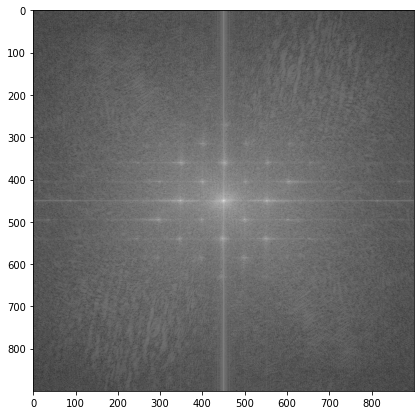

In [115]:
from scipy import fftpack

dim_x, dim_y = grayim.shape

n = np.sqrt(dim_x*dim_y)
D1 = fftpack.fft2(grayim)/n
D2 = fftpack.fftshift(D1)
abs_image = np.log(np.abs(D2))

plt.figure(figsize=(7,7))
plt.imshow(abs_image, cmap='gist_gray')

### Masking the Image

Will be using Laplasian of Gaussian (LoG) filter for this

$$
\text{LoG}(x,y) = -\frac{1}{\pi\sigma^4}\left[1-\frac{x^2+y^2}{2\sigma^2}\right] e^{-\frac{x^2+y^2}{2\sigma^2}}
$$

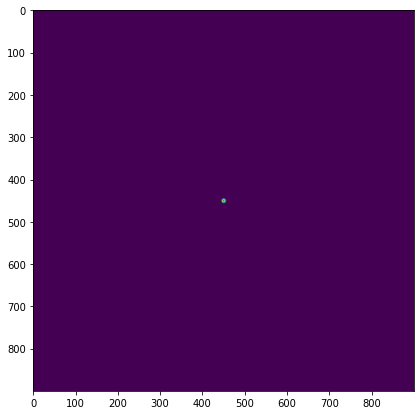

In [130]:

mask_n = dim_x+1
I = np.arange(1, mask_n)
x = I - mask_n / 2
y = mask_n / 2 - I

R = 75

X = x[:, np.newaxis]
Y = y[np.newaxis, :]

def laplasian(x, y, sigma=R):
    inner_frac = - (x**2 + y**2)/(2*sigma**2)
    outer_frac = -1/(np.pi*sigma**4)
    return outer_frac*(1 + inner_frac)*np.exp(inner_frac)


M = laplasian(X, Y)

mask_1 = fftpack.fft2(M)/mask_n
mask_2 = fftpack.fftshift(mask_1)

plt.figure(figsize=(7,7))
mask = np.abs(mask_2)
plt.imshow(mask)

### Smoothen Image

Use inverse fast fourier transform to smoothen the image

In [131]:
'''
Inverse FFT
'''
shifted_D2 = np.fft.fftshift(D2*M)
inverse = np.fft.ifft2(shifted_D2)

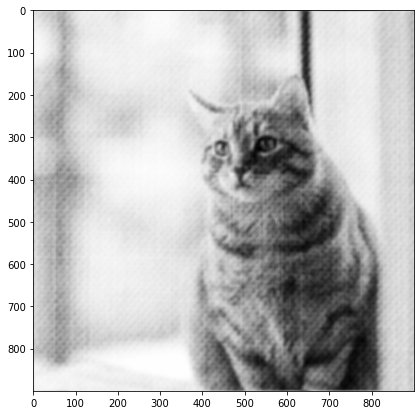

In [135]:
image_inv = np.abs(inverse)
image_inv -= image_inv.min()
image_inv *= 255.0/image_inv.max()
image_inv = image_inv.astype(dtype='int64')

plt.figure(figsize=(7,7))
plt.imshow(image_inv, cmap='gist_gray')

### do the same with each color (should've created a function)

In [136]:
def mask_color(color, image=image, n=n, M=M):
    colorim = image[...,color]
    D1 = fftpack.fft2(colorim)/n
    D2 = fftpack.fftshift(D1)
    shifted_D2 = np.fft.fftshift(D2*M)
    inverse = np.fft.ifft2(shifted_D2)
    image_inv = np.abs(inverse)
    image_inv -= image_inv.min()
    image_inv *= 255.0/image_inv.max()
    image_inv = image_inv.astype(dtype='int64')
    return image_inv

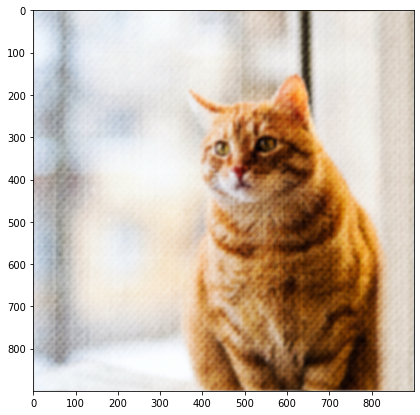

In [137]:
restored_cat = np.dstack([mask_color(i) for i in range(3)])
plt.figure(figsize=(7,7))
plt.imshow(restored_cat)